In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_india = df[df['job_country'] == 'India'].copy()
df_india

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
16,Data Engineer,Big Data Engineer,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-06-15 13:28:03,False,False,India,None,NaN,NaN,Hexaware Technologies,"['powershell', 'python', 'sql', 'mysql', 'sql ...","{'cloud': ['databricks', 'azure'], 'databases'..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['..."
29,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Exusia,Full-time,False,India,2023-03-26 13:16:20,False,False,India,None,NaN,NaN,Exusia,None,None
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","['sql', 'python', 'databricks', 'power bi', 'e...","{'analyst_tools': ['power bi', 'excel', 'word'..."
42,Senior Data Engineer,"Senior Data Engineer(Python)-1563,1637&1633","Chennai, Tamil Nadu, India",via HR Software For Growing Businesses | Fresh...,Full-time,False,India,2023-11-10 13:30:41,True,False,India,None,NaN,NaN,CESIT,"['python', 'sql', 'aws', 'pyspark', 'docker', ...","{'async': ['jira'], 'cloud': ['aws'], 'librari..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785712,Data Engineer,India - Collections Analyst II,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Varite India Private Limited,"['excel', 'flow']","{'analyst_tools': ['excel'], 'other': ['flow']}"
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None
785716,Software Engineer,Application Support Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,CompuGroup Medical,"['c#', 'sql']","{'programming': ['c#', 'sql']}"
785718,Business Analyst,Senior Performance QA Analyst,India,melalui BeBee India,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Diebold Nixdorf,None,None


In [3]:
df_india['job_month'] = df_india['job_posted_date'].dt.to_period('M')
df_india.sample(n=5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_month
674913,Senior Data Scientist,Senior Data Scientist,India,via LinkedIn,Full-time,False,India,2023-04-28 10:13:34,False,False,India,None,NaN,NaN,Mobile Premier League (MPL),"['sql', 'python', 'spark', 'flask']","{'libraries': ['spark'], 'programming': ['sql'...",2023-04
294288,Data Engineer,Big Data Engineer,"Bengaluru, Karnataka, India",via BeBee India,Full-time,False,India,2023-07-02 17:33:11,True,False,India,None,NaN,NaN,Apple Inc.,"['sql', 'java', 'python', 'scala', 'cassandra'...","{'cloud': ['snowflake', 'azure'], 'databases':...",2023-07
306820,Data Engineer,Data Engineer - Python/PySpark,India,via Adzuna,Full-time,False,India,2023-01-24 17:14:40,False,False,India,None,NaN,NaN,Crescendo Global Leadership Hiring India Pvt. ...,"['sql', 'python', 'aws', 'azure', 'pyspark', '...","{'cloud': ['aws', 'azure'], 'libraries': ['pys...",2023-01
629201,Data Scientist,Head of Data Management,India,via LinkedIn,Full-time,False,India,2023-12-27 12:09:46,False,False,India,None,NaN,NaN,OSBIndia Private Limited,"['java', 'scala', 'python', 'sql', 'nosql', 'm...","{'analyst_tools': ['power bi'], 'cloud': ['azu...",2023-12
626302,Data Analyst,Data Analyst/Data Modeler_,India,via BeBee India,Contractor,False,India,2023-05-31 12:13:23,True,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,"['sql', 'crystal', 'cognos', 'microstrategy', ...","{'analyst_tools': ['cognos', 'microstrategy', ...",2023-05


In [4]:
df_india_pivot = df_india.pivot_table(index='job_month', columns='job_title_short', aggfunc='size')
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_month,,,,,,,,,,
2023-01,175,31,628,2132,1444,70,127,448,269,192
2023-02,143,35,433,1631,932,42,94,313,165,157
2023-03,116,37,422,1591,1005,34,96,351,194,180
2023-04,170,32,418,1566,946,54,86,375,194,169
2023-05,103,14,278,1384,837,31,59,329,134,98
2023-06,146,26,367,1632,1129,41,66,427,238,125
2023-07,142,25,457,1528,1123,54,75,359,204,155
2023-08,189,25,618,1407,1157,47,126,343,235,148
2023-09,155,34,630,1508,984,67,85,324,195,132


In [5]:
df_india['job_title_short'].value_counts()

job_title_short
Data Engineer                19062
Data Scientist               13279
Data Analyst                  6121
Senior Data Engineer          4353
Senior Data Scientist         2486
Business Analyst              1887
Software Engineer             1795
Senior Data Analyst           1083
Machine Learning Engineer      671
Cloud Engineer                 351
Name: count, dtype: int64

In [10]:
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
top_3

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [11]:
df_india_pivot[top_3]

job_title_short,Data Engineer,Data Scientist,Data Analyst
job_month,,,
2023-01,2132,1444,628
2023-02,1631,932,433
2023-03,1591,1005,422
2023-04,1566,946,418
2023-05,1384,837,278
2023-06,1632,1129,367
2023-07,1528,1123,457
2023-08,1407,1157,618
2023-09,1508,984,630


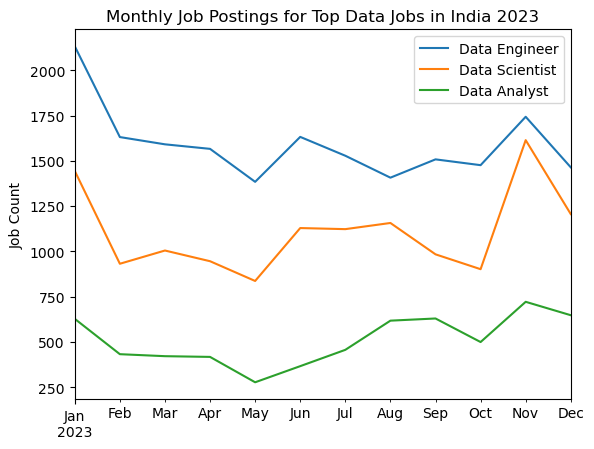

In [17]:
df_india_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in India 2023')
plt.xlabel('')
plt.ylabel('Job Count')
plt.legend()
plt.show()
